##  Première analyse : Mots-clés et nuage de mots sur les 3 décénies

In [20]:
import os
import yake
from datetime import datetime
import os
import sys
import nltk
import re
from nltk.tokenize import sent_tokenize

In [21]:
# Le répertoire qui contient vos fichiers txt exportés de Camille
indir = "../data/camille_vaccination_/"
# Le répertoire qui contiendra les fichiers txt nettoyés
outdir = "../data/txt_clean"

if not os.path.exists(outdir):
    os.mkdir(outdir)

In [26]:
query = ["vaccination","vaccin"]

In [27]:
# Création d'une regex afin de trouver les mots de la liste query dans le texte
regex = re.compile(f"\\b({'|'.join(query)})\\b", re.IGNORECASE)

In [28]:
for file in os.listdir(indir)[:10]:
    if file.endswith(".txt"):
        relevant_sentences = []
        f_in = open(os.path.join(indir, file), encoding="utf-8")
        text = f_in.read()
        for sentence in sent_tokenize(text):
            if regex.search(sentence):
                relevant_sentences.append(sentence)
        f_in.close()
        f_out = open(os.path.join(outdir, file), "w", encoding="utf-8")
        f_out.write("\n\n".join(relevant_sentences))
        f_out.close()

In [29]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [31]:
# Lister les Fichiers
data_path = "../data/txt_clean"
files = os.listdir(data_path)

In [41]:
for f in sorted(files)[:1000]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB421_1899-03-20_01-00002.txt mentions these keywords: chose curieuse, analogueàla vaccination, dis-je appliqué, s'en servait, titre préventif, d'une mesure, mesure hygiénique, hygiénique analogueàla, montrait absolument, absolument incapable, incapable d'arrêter, d'en atténuer...
KB_JB421_1899-05-27_01-00003.txt mentions these keywords: conseil communal, traitement d'une, d'une commune, soins donnés, faire partie...
KB_JB421_1899-06-01_01-00003.txt mentions these keywords: ...
KB_JB421_1899-11-30_01-00002.txt mentions these keywords: revaccination obligatoires, loi sanitaire, prochainement soumettre, législature rend...
KB_JB421_1899-12-11_01-00002.txt mentions these keywords: tient prêts, nombre déjà...
KB_JB421_1900-07-25_01-00003.txt mentions these keywords: remèdes préventifs, l'un consiste, mesures sanitaires, sanitaires propres, vaccination s'est...
KB_JB555_1870-02-20_01-00001.txt mentions these keywords: nouvelle doctrine, vaccination directe, l'animal malade, l'épouvantabl

## Nuage de mots 

In [33]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\louel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem","rue", "villa","louer",
       "maison","fr","app","ch","vendre","prix","bel","av","jard","Libre","jardin","vue",
       "téléphone","centre","terrain"]
sw = set(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\louel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


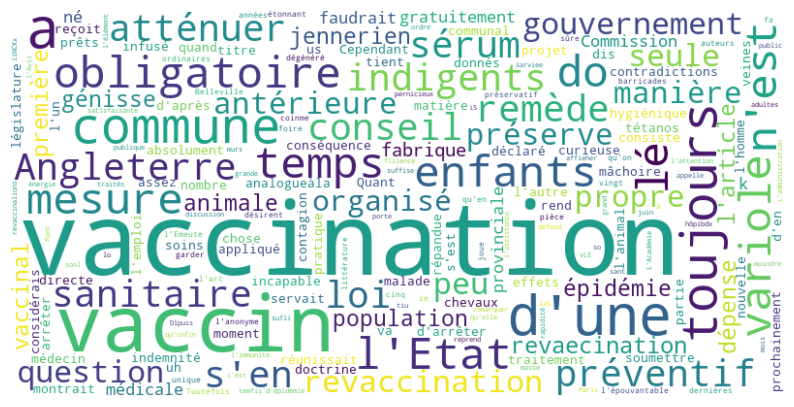

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import os

# Télécharger les stopwords si ce n'est pas déjà fait
import nltk
nltk.download('stopwords')

# Liste des stopwords du français
sw = set(stopwords.words("french"))

# Ajout de mots personnalisés à la liste des stopwords
custom_sw = [
    "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
    "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
    "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
    "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
    "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "villa", "louer",
    "maison", "fr", "app", "ch", "vendre", "prix", "bel", "av", "jard", "Libre", "jardin", "do"
    "a", "vue", "téléphone", "centre", "terrain", "déjà","ot","u","qu'il","or", "qu'une","l'a"
]

# Ajout des mots personnalisés à la liste des stopwords
sw.update(custom_sw)

data_path = "../data/txt_clean"

if os.path.isdir(data_path):
    files = os.listdir(data_path)
    
    combined_text = ""
    for file_name in files:
        file_path = os.path.join(data_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                file_text = file.read()
                combined_text += file_text + " "
    
    # Créer un nuage de mots en excluant les stopwords
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=sw).generate(combined_text)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Le chemin spécifié n'est pas un répertoire valide.")


## Analyse 